<a href="https://colab.research.google.com/github/benvekedim/machine-learning-101/blob/main/clustering/Fraud-Data-Analysis/fraud_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Dataset

In [ ]:
import numpy as np
import pandas as pd
#Veri görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

#veri standartlaştırma
from sklearn.preprocessing import StandardScaler
#Veriyi kümeleme
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
fraud_data = pd.read_csv("https://raw.githubusercontent.com/JarFraud/FraudDetection/master/uscecchini28.csv")
fraud_data

,fyear,gvkey,sich,insbnk,understatement,option,p_aaer,new_p_aaer,misstate,act,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,3460.0,0,0,0,NaN,NaN,0,10.047,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,4841.0,0,0,0,NaN,NaN,0,1.247,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,3812.0,0,0,0,NaN,NaN,0,55.040,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,3861.0,0,0,0,NaN,NaN,0,24.684,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,7385.0,0,0,0,NaN,NaN,0,17.325,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,2014,314866,8200.0,0,0,0,NaN,NaN,0,262.600,...,0.751944,0.560406,0.127217,-0.050591,1,0.103693,0.829680,-0.327178,-0.008179,-0.261606
146041,2014,315318,2890.0,0,0,0,NaN,NaN,0,1578.400,...,0.742781,-0.118178,0.031360,0.095355,1,0.581796,0.743084,-0.077826,0.000461,-0.296702
146042,2014,316056,3420.0,0,0,0,NaN,NaN,0,973.800,...,0.751129,0.004207,-0.037925,0.072050,1,-0.000903,1.063878,-0.002877,0.153133,0.065569
146043,2014,317260,4412.0,0,0,0,NaN,NaN,0,51.743,...,0.018001,NaN,NaN,NaN,1,1.109467,NaN,0.000000,0.028804,NaN


In [ ]:
fraud_data.columns

Index(['fyear', 'gvkey', 'sich', 'insbnk', 'understatement', 'option',
       'p_aaer', 'new_p_aaer', 'misstate', 'act', 'ap', 'at', 'ceq', 'che',
       'cogs', 'csho', 'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao',
       'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk', 're', 'rect', 'sale',
       'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec',
       'dch_inv', 'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm',
       'dpi', 'reoa', 'EBIT', 'ch_fcf'],
      dtype='object')

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fyear           146045 non-null  int64  
 1   gvkey           146045 non-null  int64  
 2   sich            132516 non-null  float64
 3   insbnk          146045 non-null  int64  
 4   understatement  146045 non-null  int64  
 5   option          146045 non-null  int64  
 6   p_aaer          964 non-null     float64
 7   new_p_aaer      964 non-null     float64
 8   misstate        146045 non-null  int64  
 9   act             146045 non-null  float64
 10  ap              146045 non-null  float64
 11  at              146045 non-null  float64
 12  ceq             146045 non-null  float64
 13  che             146045 non-null  float64
 14  cogs            146045 non-null  float64
 15  csho            146045 non-null  float64
 16  dlc             146045 non-null  float64
 17  dltis     

In [ ]:
copy_fraud_data = fraud_data.copy()
#copy_fraud_data

In [ ]:
fraud_data.shape[0] #satır sayısı


146045

In [ ]:
fraud_data.isnull().sum() 

fyear                  0
gvkey                  0
sich               13529
insbnk                 0
understatement         0
option                 0
p_aaer            145081
new_p_aaer        145081
misstate               0
act                    0
ap                     0
at                     0
ceq                    0
che                    0
cogs                   0
csho                   0
dlc                    0
dltis                  0
dltt                   0
dp                     0
ib                     0
invt                   0
ivao                   0
ivst                   0
lct                    0
lt                     0
ni                     0
ppegt                  0
pstk                   0
re                     0
rect                   0
sale                   0
sstk                   0
txp                    0
txt                    0
xint                   0
prcc_f                 0
dch_wc              4759
ch_rsst             4851
dch_rec             4743


In [ ]:
cleaned_fraud_data = fraud_data.dropna(axis=1)
cleaned_fraud_data

,fyear,gvkey,insbnk,understatement,option,misstate,act,ap,at,ceq,...,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f,issue
0,1990,1009,0,0,0,0,10.047,3.736,32.335,6.262,...,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000,1
1,1990,1011,0,0,0,0,1.247,0.803,7.784,0.667,...,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188,1
2,1990,1017,0,0,0,0,55.040,3.601,118.120,44.393,...,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125,1
3,1990,1021,0,0,0,0,24.684,3.948,34.591,7.751,...,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562,1
4,1990,1028,0,0,0,0,17.325,3.520,27.542,-12.142,...,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,2014,314866,0,0,0,0,262.600,12.400,1234.800,194.100,...,0.000,-404.000,80.800,474.600,323.800,1.700,25.700,54.600,19.150,1
146041,2014,315318,0,0,0,0,1578.400,106.700,4557.600,2459.600,...,0.000,-354.700,327.300,843.200,1512.600,16.700,-6.700,38.700,23.220,1
146042,2014,316056,0,0,0,0,973.800,249.500,2015.900,-4.800,...,0.000,-5.800,259.900,2118.300,14.100,36.300,84.200,49.300,55.460,1
146043,2014,317260,0,0,0,0,51.743,1.555,322.421,319.230,...,0.000,0.000,3.103,52.789,100.199,1.212,1.212,1.144,12.280,1


In [ ]:
cleaned_fraud_data.isnull().sum()

fyear             0
gvkey             0
insbnk            0
understatement    0
option            0
misstate          0
act               0
ap                0
at                0
ceq               0
che               0
cogs              0
csho              0
dlc               0
dltis             0
dltt              0
dp                0
ib                0
invt              0
ivao              0
ivst              0
lct               0
lt                0
ni                0
ppegt             0
pstk              0
re                0
rect              0
sale              0
sstk              0
txp               0
txt               0
xint              0
prcc_f            0
issue             0
dtype: int64

In [ ]:
cleaned_fraud_data.corr()

,fyear,gvkey,insbnk,understatement,option,misstate,act,ap,at,ceq,...,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f,issue
fyear,1.000000,0.498714,-0.000045,-0.000539,-0.004272,-0.008860,0.094905,0.082393,0.103279,0.095359,...,-0.014575,0.049980,0.071651,0.084124,0.039318,0.034459,0.056575,0.073475,0.035904,-0.024336
gvkey,0.498714,1.000000,-0.004758,-0.004406,-0.005476,-0.006475,-0.026448,-0.025661,-0.016951,-0.007002,...,-0.035041,-0.026841,-0.027251,-0.036861,0.018277,-0.018506,-0.017103,-0.011009,-0.051319,-0.009023
insbnk,-0.000045,-0.004758,1.000000,-0.002334,0.008452,0.005171,-0.006625,0.001014,-0.011139,-0.008836,...,-0.010006,-0.004110,-0.012944,-0.012417,-0.000428,-0.016353,-0.007684,-0.022770,0.004337,-0.045835
understatement,-0.000539,-0.004406,-0.002334,1.000000,-0.000395,0.163700,-0.000649,-0.001000,-0.001105,-0.001302,...,0.000032,-0.000738,-0.000540,-0.000537,-0.000114,-0.000361,-0.001255,-0.000793,0.001113,0.002316
option,-0.004272,-0.005476,0.008452,-0.000395,1.000000,0.363345,0.001488,0.007283,-0.000407,0.001332,...,-0.000453,-0.001208,-0.001257,0.001717,0.004892,-0.001755,0.001592,-0.004742,0.015703,0.011776
misstate,-0.008860,-0.006475,0.005171,0.163700,0.363345,1.000000,0.022300,0.027725,0.021769,0.021051,...,0.003397,0.003421,0.021312,0.019871,0.028054,0.006423,0.007395,0.027066,0.020197,0.023545
act,0.094905,-0.026448,-0.006625,-0.000649,0.001488,0.022300,1.000000,0.837398,0.878315,0.781781,...,0.087006,0.613358,0.921919,0.833866,0.250608,0.567046,0.594196,0.581960,0.149363,0.063094
ap,0.082393,-0.025661,0.001014,-0.001000,0.007283,0.027725,0.837398,1.000000,0.814882,0.714306,...,0.087013,0.601986,0.799190,0.909881,0.173988,0.541236,0.627781,0.573818,0.130508,0.056821
at,0.103279,-0.016951,-0.011139,-0.001105,-0.000407,0.021769,0.878315,0.814882,1.000000,0.922935,...,0.119306,0.645504,0.824882,0.838974,0.275601,0.638569,0.644187,0.776689,0.140180,0.065528
ceq,0.095359,-0.007002,-0.008836,-0.001302,0.001332,0.021051,0.781781,0.714306,0.922935,1.000000,...,0.071435,0.715160,0.698456,0.765433,0.286305,0.631110,0.665308,0.616064,0.133828,0.056817


In [ ]:
# ap -- Account Payable, Trade
cleaned_fraud_data[['ap']]

,ap
0,3.736
1,0.803
2,3.601
3,3.948
4,3.520
...,...
146040,12.400
146041,106.700
146042,249.500
146043,1.555


In [ ]:
# sale -- Sales/Turnover (Net)
cleaned_fraud_data[['sale']]

,sale
0,40.522
1,3.635
2,144.258
3,48.292
4,33.543
...,...
146040,474.600
146041,843.200
146042,2118.300
146043,52.789


In [ ]:
cleaned_ap = np.array(cleaned_fraud_data[['ap']])[:,0]
cleaned_ap

array([  3.736,   0.803,   3.601, ..., 249.5  ,   1.555,   5.224])

In [ ]:
cleaned_sale = np.array(cleaned_fraud_data[['sale']])[:,0]
cleaned_sale

array([  40.522,    3.635,  144.258, ..., 2118.3  ,   52.789,  104.129])

Text(0.5, 1.0, 'Visualization of raw data')

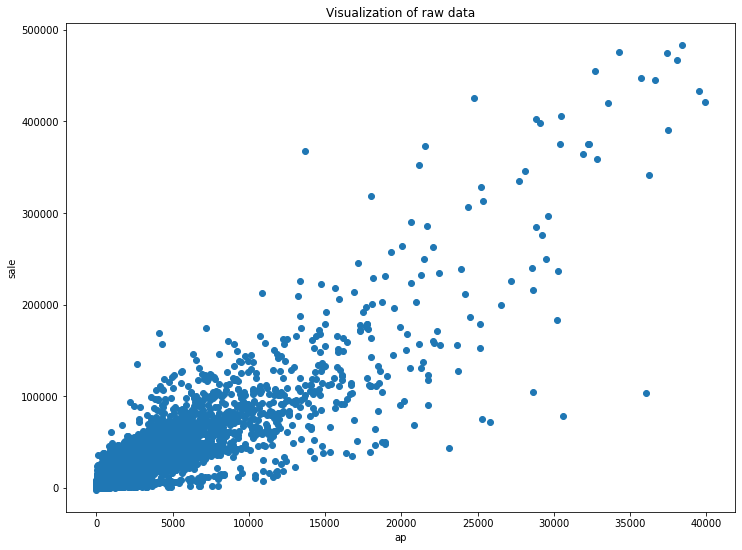

In [ ]:
plt.figure(figsize = (12, 9))
plt.scatter(cleaned_ap, cleaned_sale)
plt.xlabel('ap')
plt.ylabel('sale')
plt.title('Visualization of raw data')

In [ ]:
scaler = StandardScaler()
df_cleaned = scaler.fit_transform(cleaned_fraud_data)
#df_cleaned

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

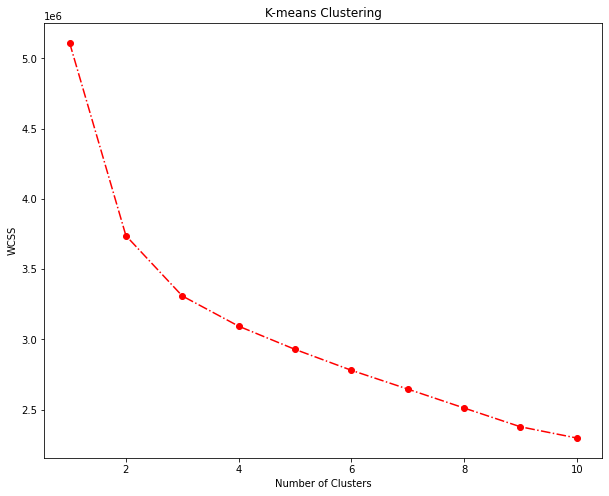

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

In [ ]:
kmeans.fit(df_cleaned)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_fraud_label = df_cleaned.copy()
df_fraud_label = pd.DataFrame(data=df_cleaned,columns=cleaned_fraud_data.columns)
df_fraud_label['fraud-or-not'] = kmeans.labels_


In [ ]:
df_fraud_label.head()

,fyear,gvkey,insbnk,understatement,option,misstate,act,ap,at,ceq,...,re,rect,sale,sstk,txp,txt,xint,prcc_f,issue,fraud-or-not
0,-1.725851,-0.888169,-0.174923,-0.013344,-0.029618,-0.081514,-0.194364,-0.170167,-0.195833,-0.174189,...,-0.089310,-0.165897,-0.180167,-0.128242,-0.121463,-0.115496,-0.209309,-0.212737,0.397611,1
1,-1.725851,-0.888136,-0.174923,-0.013344,-0.029618,-0.081514,-0.196714,-0.172967,-0.197886,-0.175296,...,-0.091128,-0.170083,-0.183749,-0.128214,-0.121463,-0.117126,-0.218676,-0.325017,0.397611,1
2,-1.725851,-0.888036,-0.174923,-0.013344,-0.029618,-0.081514,-0.182348,-0.170296,-0.188659,-0.166649,...,-0.080761,-0.140245,-0.170094,-0.128242,-0.121463,-0.115036,-0.200296,-0.233154,0.397611,1
3,-1.725851,-0.887969,-0.174923,-0.013344,-0.029618,-0.081514,-0.190455,-0.169965,-0.195644,-0.173895,...,-0.089754,-0.164866,-0.179413,-0.128242,-0.119168,-0.116352,-0.209663,-0.316291,0.397611,1
4,-1.725851,-0.887852,-0.174923,-0.013344,-0.029618,-0.081514,-0.192420,-0.170374,-0.196233,-0.177829,...,-0.095820,-0.166240,-0.180845,-0.128242,-0.121463,-0.117126,-0.202797,-0.326487,-2.515020,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


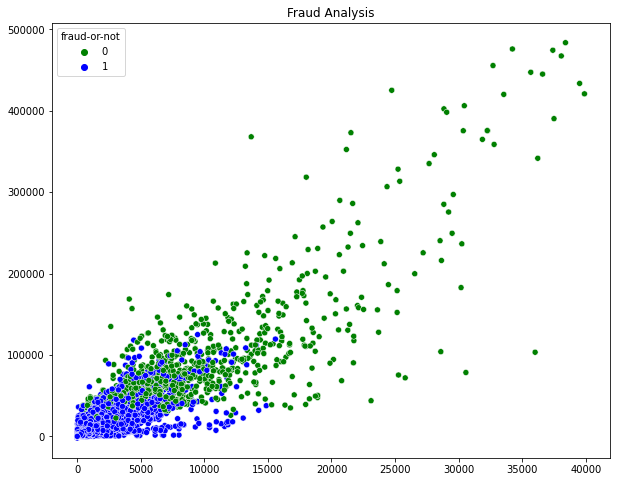

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(cleaned_ap,cleaned_sale,hue=df_fraud_label['fraud-or-not'],palette=['g','b'])
plt.title('Fraud Analysis')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_cleaned,kmeans.labels_,metric='euclidean')

#Print the score

print('Silhoutte Score: %.3f'%score)

Silhoutte Score: 0.918


## Removing features with low variance

In [ ]:
#from sklearn.feature_selection import VarianceThreshold
cleaned_fraud_data.head()

,fyear,gvkey,insbnk,understatement,option,misstate,act,ap,at,ceq,...,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f,issue
0,1990,1009,0,0,0,0,10.047,3.736,32.335,6.262,...,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000,1
1,1990,1011,0,0,0,0,1.247,0.803,7.784,0.667,...,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188,1
2,1990,1017,0,0,0,0,55.040,3.601,118.120,44.393,...,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125,1
3,1990,1021,0,0,0,0,24.684,3.948,34.591,7.751,...,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562,1
4,1990,1028,0,0,0,0,17.325,3.520,27.542,-12.142,...,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125,0


In [ ]:
cleaned_fraud_data.shape

(146045, 35)

In [ ]:
cleaned_fraud_data.values

array([[1.99000e+03, 1.00900e+03, 0.00000e+00, ..., 2.33300e+00,
        6.00000e+00, 1.00000e+00],
       [1.99000e+03, 1.01100e+03, 0.00000e+00, ..., 6.40000e-01,
        1.18800e+00, 1.00000e+00],
       [1.99000e+03, 1.01700e+03, 0.00000e+00, ..., 3.96200e+00,
        5.12500e+00, 1.00000e+00],
       ...,
       [2.01400e+03, 3.16056e+05, 0.00000e+00, ..., 4.93000e+01,
        5.54600e+01, 1.00000e+00],
       [2.01400e+03, 3.17260e+05, 0.00000e+00, ..., 1.14400e+00,
        1.22800e+01, 1.00000e+00],
       [2.01400e+03, 3.17264e+05, 0.00000e+00, ..., 3.79100e+00,
        1.30300e+01, 1.00000e+00]])

In [ ]:
type(cleaned_fraud_data.values)

numpy.ndarray

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = cleaned_fraud_data.values 
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[1.99000e+03, 1.00900e+03, 1.00470e+01, ..., 7.69000e-01,
        2.33300e+00, 6.00000e+00],
       [1.99000e+03, 1.01100e+03, 1.24700e+00, ..., 0.00000e+00,
        6.40000e-01, 1.18800e+00],
       [1.99000e+03, 1.01700e+03, 5.50400e+01, ..., 9.86000e-01,
        3.96200e+00, 5.12500e+00],
       ...,
       [2.01400e+03, 3.16056e+05, 9.73800e+02, ..., 8.42000e+01,
        4.93000e+01, 5.54600e+01],
       [2.01400e+03, 3.17260e+05, 5.17430e+01, ..., 1.21200e+00,
        1.14400e+00, 1.22800e+01],
       [2.01400e+03, 3.17264e+05, 2.33211e+02, ..., 0.00000e+00,
        3.79100e+00, 1.30300e+01]])

In [ ]:
features = sel.get_support(indices=True)
features
#returns an array of integers corresponding to unremoved features


array([ 0,  1,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:

sel.fit_transform(X).shape

(146045, 30)

In [ ]:
var_thres_clean = sel.fit_transform(X)
var_thres_clean

array([[1.99000e+03, 1.00900e+03, 1.00470e+01, ..., 7.69000e-01,
        2.33300e+00, 6.00000e+00],
       [1.99000e+03, 1.01100e+03, 1.24700e+00, ..., 0.00000e+00,
        6.40000e-01, 1.18800e+00],
       [1.99000e+03, 1.01700e+03, 5.50400e+01, ..., 9.86000e-01,
        3.96200e+00, 5.12500e+00],
       ...,
       [2.01400e+03, 3.16056e+05, 9.73800e+02, ..., 8.42000e+01,
        4.93000e+01, 5.54600e+01],
       [2.01400e+03, 3.17260e+05, 5.17430e+01, ..., 1.21200e+00,
        1.14400e+00, 1.22800e+01],
       [2.01400e+03, 3.17264e+05, 2.33211e+02, ..., 0.00000e+00,
        3.79100e+00, 1.30300e+01]])

In [ ]:
cleaned_fraud_data.columns

Index(['fyear', 'gvkey', 'insbnk', 'understatement', 'option', 'misstate',
       'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho', 'dlc', 'dltis', 'dltt',
       'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt', 'ni', 'ppegt', 'pstk',
       're', 'rect', 'sale', 'sstk', 'txp', 'txt', 'xint', 'prcc_f', 'issue'],
      dtype='object')

In [ ]:
cleaned_fraud_data.iloc[:,features].columns

Index(['fyear', 'gvkey', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho',
       'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt',
       'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt',
       'xint', 'prcc_f'],
      dtype='object')

In [ ]:
variance_cleaned = pd.DataFrame(data=var_thres_clean,columns=cleaned_fraud_data.iloc[:,features].columns)
variance_cleaned.head()

,fyear,gvkey,act,ap,at,ceq,che,cogs,csho,dlc,...,ppegt,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f
0,1990.0,1009.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,31.767,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000
1,1990.0,1011.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,7.328,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188
2,1990.0,1017.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,78.331,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125
3,1990.0,1021.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,11.145,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562
4,1990.0,1028.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,5.782,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125


In [ ]:
# variance_cleaned - df için KMeans
# var_thres_clean - np array

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(var_thres_clean)
    wcss.append(kmeans.inertia_)

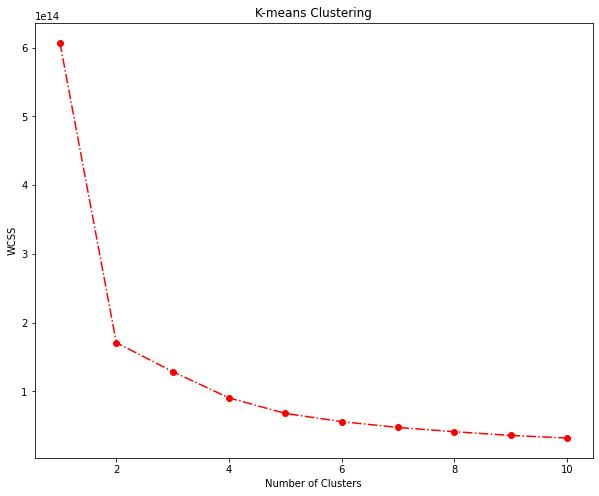

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

In [ ]:
kmeans.fit(var_thres_clean)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# variance_cleaned - df için KMeans
# var_thres_clean - np array

variance_cleaned_labeled = variance_cleaned.copy()
variance_cleaned_labeled = pd.DataFrame(data=var_thres_clean,columns=cleaned_fraud_data.iloc[:,features].columns )
variance_cleaned_labeled['fraud-or-not'] = kmeans.labels_


In [ ]:
variance_cleaned_labeled.head()

,fyear,gvkey,act,ap,at,ceq,che,cogs,csho,dlc,...,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f,fraud-or-not
0,1990.0,1009.0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.000,5.420,6.895,40.522,0.000,0.000,0.769,2.333,6.000,1
1,1990.0,1011.0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.000,-3.339,0.290,3.635,0.006,0.000,0.000,0.640,1.188,1
2,1990.0,1017.0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.000,46.630,47.366,144.258,0.000,0.000,0.986,3.962,5.125,1
3,1990.0,1021.0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,1.295,3.280,8.522,48.292,0.000,0.448,0.365,2.269,1.562,1
4,1990.0,1028.0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.000,-25.955,6.354,33.543,0.000,0.000,0.000,3.510,1.125,1


In [ ]:
variance_cleaned_labeled.corr()

,fyear,gvkey,act,ap,at,ceq,che,cogs,csho,dlc,...,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f,fraud-or-not
fyear,1.000000,0.498714,0.094905,0.082393,0.103279,0.095359,0.099049,0.074431,0.097624,0.044021,...,-0.014575,0.049980,0.071651,0.084124,0.039318,0.034459,0.056575,0.073475,0.035904,-0.457807
gvkey,0.498714,1.000000,-0.026448,-0.025661,-0.016951,-0.007002,-0.005180,-0.035740,0.028286,-0.006766,...,-0.035041,-0.026841,-0.027251,-0.036861,0.018277,-0.018506,-0.017103,-0.011009,-0.051319,-0.911750
act,0.094905,-0.026448,1.000000,0.837398,0.878315,0.781781,0.824967,0.775588,0.380716,0.756073,...,0.087006,0.613358,0.921919,0.833866,0.250608,0.567046,0.594196,0.581960,0.149363,0.012156
ap,0.082393,-0.025661,0.837398,1.000000,0.814882,0.714306,0.606061,0.893112,0.320160,0.626860,...,0.087013,0.601986,0.799190,0.909881,0.173988,0.541236,0.627781,0.573818,0.130508,0.013540
at,0.103279,-0.016951,0.878315,0.814882,1.000000,0.922935,0.696252,0.766761,0.422942,0.732312,...,0.119306,0.645504,0.824882,0.838974,0.275601,0.638569,0.644187,0.776689,0.140180,0.004893
ceq,0.095359,-0.007002,0.781781,0.714306,0.922935,1.000000,0.674905,0.688589,0.431327,0.589192,...,0.071435,0.715160,0.698456,0.765433,0.286305,0.631110,0.665308,0.616064,0.133828,-0.001946
che,0.099049,-0.005180,0.824967,0.606061,0.696252,0.674905,1.000000,0.499444,0.387291,0.504066,...,0.073945,0.462425,0.627657,0.582301,0.269170,0.459817,0.481826,0.447832,0.127099,-0.002313
cogs,0.074431,-0.035740,0.775588,0.893112,0.766761,0.688589,0.499444,1.000000,0.277419,0.596105,...,0.076975,0.635809,0.726937,0.980731,0.149808,0.536944,0.633136,0.524890,0.123958,0.020648
csho,0.097624,0.028286,0.380716,0.320160,0.422942,0.431327,0.387291,0.277419,1.000000,0.241878,...,0.045076,0.256877,0.313008,0.338440,0.174195,0.309663,0.307173,0.339818,0.036639,-0.030225
dlc,0.044021,-0.006766,0.756073,0.626860,0.732312,0.589192,0.504066,0.596105,0.241878,1.000000,...,0.063421,0.433933,0.805588,0.631811,0.167136,0.396056,0.359770,0.542132,0.087838,0.001397


In [ ]:
#ap
variance_cleaned_labeled_ap = np.array(variance_cleaned_labeled[['ap']])[:,0]
variance_cleaned_labeled_ap

array([  3.736,   0.803,   3.601, ..., 249.5  ,   1.555,   5.224])

In [ ]:
#sale
variance_cleaned_labeled_sale = np.array(variance_cleaned_labeled[['sale']])[:,0]
variance_cleaned_labeled_sale

array([  40.522,    3.635,  144.258, ..., 2118.3  ,   52.789,  104.129])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


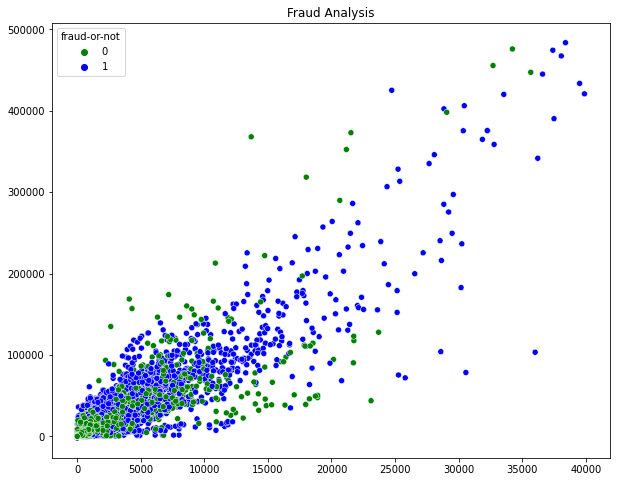

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(variance_cleaned_labeled_ap,variance_cleaned_labeled_sale,hue=variance_cleaned_labeled['fraud-or-not'],palette=['g','b'])
plt.title('Fraud Analysis')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(var_thres_clean,kmeans.labels_,metric='euclidean')

#Print the score

print('Silhoutte Score: %.3f'%score)

Silhoutte Score: 0.750


## PyTorch - Clustering

In [ ]:
import torch
import numpy as np

!pip install kmeans_pytorch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmeans_pytorch import kmeans
torch_var_thres_clean = torch.from_numpy(var_thres_clean)
cluster_ids_x, cluster_centers = kmeans(
    X=torch_var_thres_clean, num_clusters=2, distance='euclidean'
)

running k-means on cpu..


[running kmeans]: 3it [00:00,  6.36it/s, center_shift=0.000000, iteration=3, tol=0.000100]


In [ ]:
cluster_ids_x

tensor([1, 1, 1,  ..., 0, 0, 0])

In [ ]:
type(cluster_ids_x)

torch.Tensor

In [ ]:
cluster_centers

tensor([[2.0076e+03, 1.4965e+05, 6.5838e+02, 1.5723e+02, 2.2719e+03, 9.0431e+02,
         2.2403e+02, 1.0185e+03, 1.2555e+02, 1.2473e+02, 2.4599e+02, 5.2088e+02,
         1.1475e+02, 8.8008e+01, 1.2170e+02, 5.5422e+01, 6.6269e+01, 5.2989e+02,
         1.3147e+03, 8.9445e+01, 1.6815e+03, 5.0253e+00, 3.1536e+02, 2.2787e+02,
         1.5162e+03, 3.4969e+01, 2.0425e+01, 4.5504e+01, 3.9247e+01, 1.2272e+01],
        [2.0002e+03, 2.2943e+04, 7.6392e+02, 1.9012e+02, 2.4076e+03, 8.8149e+02,
         2.1689e+02, 1.3954e+03, 8.7641e+01, 1.2805e+02, 1.8666e+02, 5.4412e+02,
         1.1279e+02, 1.0276e+02, 1.8280e+02, 1.0733e+02, 6.6950e+01, 5.7801e+02,
         1.4736e+03, 1.0302e+02, 1.7103e+03, 1.0775e+01, 4.7544e+02, 2.8200e+02,
         2.0204e+03, 2.5259e+01, 2.4795e+01, 5.8453e+01, 4.0466e+01, 1.6051e+01]])

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(var_thres_clean,cluster_ids_x,metric='euclidean')

#Print the score

print('Silhoutte Score: %.3f'%score)

Silhoutte Score: 0.750
